# Dream Bank

# Part 2: Dimensionality Reduction \& Time Series

**Packages**

In [110]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')

from sklearn.feature_extraction.text import TfidfVectorizer
from umap import UMAP

RANDOM_STATE = 1805

# 1. Load Data

In [75]:
dreams_cleaned_df = pd.read_csv('dreams_cleaned_df.csv')
dreams_cleaned_df = dreams_cleaned_df.dropna(subset=['text_cleaned'])

# Filter German dreams
german_dreamers = dreams_cleaned_df['dreamer'].unique().tolist()
german_dreamers = [el for el in german_dreamers if '.de' in el]
dreams_cleaned_df = dreams_cleaned_df[~dreams_cleaned_df['dreamer'].isin(german_dreamers)].copy()
print(dreams_cleaned_df.shape)

(22414, 6)


In [79]:
clean_corpus = dreams_cleaned_df['text_cleaned'].values
tfv = TfidfVectorizer(min_df=20, max_features=10000, 
                      strip_accents='unicode', analyzer='word',
                      ngram_range=(1, 2), use_idf=1, smooth_idf=1,
                      sublinear_tf=1, stop_words='english')

tfidf_matrix = tfv.fit_transform(clean_corpus)
print(tfidf_matrix.shape)

(22414, 9558)


# 2. Dimensionality Reduction

## 2.1. UMAP

In [80]:
%%time
umap_model = UMAP(metric='hellinger', random_state=RANDOM_STATE)
tfidf_embedding = umap_model.fit_transform(tfidf_matrix)
tfidf_embedding_df = pd.DataFrame(tfidf_embedding, columns=['Z1', 'Z2'])
print(tfidf_embedding.shape)

(22414, 2)
Wall time: 1min 17s


In [81]:
tfidf_embedding_df.isnull().sum()

Z1    0
Z2    0
dtype: int64

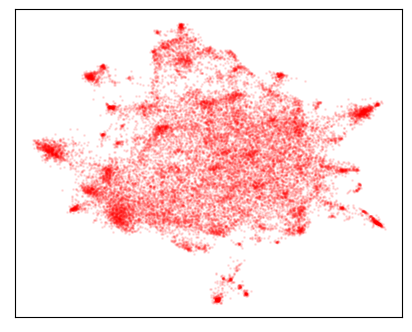

In [82]:
plt.figure(figsize=(5,4))
plt.scatter(tfidf_embedding_df['Z1'], tfidf_embedding_df['Z2'], s=1,
            color='red', alpha=0.1)
plt.xticks([])
plt.yticks([])
plt.show()

## 2.2. Supervised UMAP

In [83]:
labels = dreams_cleaned_df['dreamer'].copy()
labels = labels.factorize()[0]

In [84]:
%%time
umap_model = UMAP(metric='hellinger', random_state=RANDOM_STATE)
tfidf_embedding = umap_model.fit_transform(tfidf_matrix, y=labels)
tfidf_embedding_df = pd.DataFrame(tfidf_embedding, columns=['Z1', 'Z2'])
print(tfidf_embedding.shape)

(22414, 2)
Wall time: 1min 19s


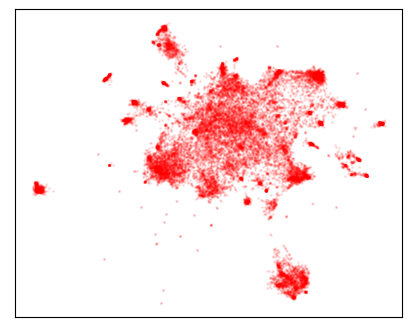

In [85]:
plt.figure(figsize=(5,4))
plt.scatter(tfidf_embedding_df['Z1'], tfidf_embedding_df['Z2'], s=1,
            color='red', alpha=0.1)
plt.xticks([])
plt.yticks([])
plt.show()

## 2.3. Save Results

In [89]:
dreams_umap_df = dreams_cleaned_df.copy()
dreams_umap_df['Z1'] = tfidf_embedding_df['Z1'].values
dreams_umap_df['Z2'] = tfidf_embedding_df['Z2'].values
dreams_umap_df.head()

,dreamer,description,number,date,content,text_cleaned,Z1,Z2
0,alta,Alta: a detailed dreamer,1,1957,"The one at the Meads's house, where it's bigge...",one mead house big inside european village ins...,14.818585,11.913500
1,alta,Alta: a detailed dreamer,2,8/11/67,I'm at a family reunion in a large fine house ...,family reunion large fine house ground maybe r...,14.774185,12.026687
2,alta,Alta: a detailed dreamer,3,8/1/85,I watch a plane fly past and shortly realize i...,watch plane fly past shortly realize low crash...,14.487709,12.045825
3,alta,Alta: a detailed dreamer,4,1985,Me pulling the green leaves and berries off so...,pull green leaf berry branch bush live one gro...,14.803592,11.984078
4,alta,Alta: a detailed dreamer,5,1985,I'm in a room that reminds me of (but definite...,room remind definitely living room house stree...,14.916678,12.033846


In [90]:
dreams_umap_df.isnull().sum()

dreamer            0
description        0
number             0
date            3210
content            0
text_cleaned       0
Z1                 0
Z2                 0
dtype: int64

In [91]:
dreams_umap_df.to_csv('dreams_umap_df.csv', index=0)

In [92]:
dreams_umap_df = pd.read_csv('dreams_umap_df.csv')

# 3. Time Series

In [118]:
dreams_time_series = dreams_umap_df.dropna(subset=['date'])
print(dreams_time_series.shape)

(19204, 8)


In [129]:
print(dreams_umap_df['date'].str.contains('\d{4}').sum())
print(dreams_umap_df['date'].str.contains('^\d{2}-\d{2}-\d{2}').sum())
print(dreams_umap_df['date'].str.contains('^\d{2}\/\d{2}\/\d{2}').sum())

6296
0
11461
